In [1]:
import sys
import os

thesis_path = "/" + os.path.join(
    *os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)


In [2]:
from evaluations.performance_01 import get_per_sample_metrics
from evaluations.utils import get_correct_latex_format
metrics_df = get_per_sample_metrics()

In [3]:
metrics_df.head()

,seed,model,checkpoint,dataset,doc_id,targets,entity_type,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
0,2,dict_match_sent,best,lowner_dev,lowner_dev_0,0,location,0,0,0,0,0,0,0,0
1,2,dict_match_sent,best,lowner_dev,lowner_dev_0,0,group,0,0,0,0,0,0,0,0
2,2,dict_match_sent,best,lowner_dev,lowner_dev_0,0,corporation,0,0,0,0,0,0,0,0
3,2,dict_match_sent,best,lowner_dev,lowner_dev_0,0,person,0,0,0,0,0,0,0,0
4,2,dict_match_sent,best,lowner_dev,lowner_dev_0,0,creative-work,0,0,2,2,0,0,0,0


In [3]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897200 entries, 0 to 10897199
Data columns (total 15 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   seed         object
 1   model        object
 2   checkpoint   object
 3   dataset      object
 4   doc_id       object
 5   targets      int64 
 6   entity_type  object
 7   tp           int64 
 8   fn           int64 
 9   fp           int64 
 10  error_type1  int64 
 11  error_type2  int64 
 12  error_type3  int64 
 13  error_type4  int64 
 14  error_type5  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ GB


In [4]:
metrics_df.describe()

,targets,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
count,1.089720e+07,1.089720e+07,1.089720e+07,1.089720e+07,1.089720e+07,1.089720e+07,1.089720e+07,1.089720e+07,1.089720e+07
mean,2.161282e-01,1.905645e-01,2.556363e-02,1.679248e-02,5.740924e-03,1.422549e-02,4.029292e-03,1.301343e-03,5.957035e-03
std,5.983969e-01,5.668767e-01,1.740430e-01,1.412545e-01,8.191047e-02,1.271610e-01,6.762273e-02,3.704992e-02,8.482927e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,1.200000e+01,8.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,6.000000e+00,3.000000e+00,5.000000e+00


# Model performance
## Micro-F1 + 5 Error Types avg+std

In [3]:
# Micro - F1
from evaluations.performance_01 import get_micro_f1_precision_recall
result = get_micro_f1_precision_recall(metrics_df, "last", "lowner_test")
result

model checkpoint      dataset         f1            \
                                                            mean       std   
4              dict_match_gaz       last  lowner_test  28.573637  0.007001   
10        dict_match_gaz_sent       last  lowner_test  29.404060  0.045085   
16       dict_match_lownergaz       last  lowner_test  20.773579  0.019751   
22  dict_match_lownergaz_sent       last  lowner_test  21.611711  0.012736   
28            dict_match_sent       last  lowner_test  29.028146  0.009593   
34              flair_roberta       last  lowner_test  84.064658  0.110460   
40                     t5_asp       last  lowner_test  85.481521  0.163211   
46                 t5_asp_gaz       last  lowner_test  86.515093  1.373751   
52            t5_asp_gaz_sent       last  lowner_test  88.478024  0.122478   
58           t5_asp_lownergaz       last  lowner_test  87.478254  2.444407   
64      t5_asp_lownergaz_sent       last  lowner_test  89.600103  0.029477   
70                t5_asp_sent       last  lowner_test  86.724683  0.218033   

    precision               recall            
         mean       std       mean       std  
4   20.357842  0.004988  47.907707  0.011738  
10  20.949493  0.032122  49.300027  0.075591  
16  11.898689  0.011313  81.744289  0.077719  
22  12.376276  0.007294  85.159514  0.050186  
28  20.691513  0.006838  48.615305  0.016067  
34  82.972975  0.316572  85.186202  0.112832  
40  86.982432  0.295482  84.031781  0.061052  
46  88.825027  0.325854  84.359655  2.830382  
52  89.540748  0.150150  87.440906  0.310630  
58  90.383760  0.077121  84.831641  4.507486  
64  90.848639  0.268918  88.386403  0.255862  
70  88.775777  0.208632  84.766828  0.357262

In [4]:
print(get_correct_latex_format(result, ["f1", "precision", "recall"], {"f1": "Micro-F1", "precision": "Precision", "recall": "Recall"}))

\begin{tabular}{llll}
\toprule
{} &     Micro-F1 &   Precision &       Recall \\
\textbf{Models                                 } &              &             &              \\
\midrule
\textbf{FLAIR\textsubscript{RoBERTa-Large}     } &   84.06 (11) &  82.97 (32) &   85.19 (11) \\
\textbf{T5-ASP                                 } &   85.48 (16) &  86.98 (30) &    84.03 (6) \\
\textbf{DictMatch\textsubscript{Gaz}           } &    28.57 (1) &   20.36 (0) &    47.91 (1) \\
\textbf{DictMatch\textsubscript{Sent}          } &    29.03 (1) &   20.69 (1) &    48.62 (2) \\
\textbf{DictMatch\textsubscript{LownerGaz}     } &    20.77 (2) &   11.90 (1) &    81.74 (8) \\
\textbf{DictMatch\textsubscript{Gaz+Sent}      } &    29.40 (5) &   20.95 (3) &    49.30 (8) \\
\textbf{DictMatch\textsubscript{LownerGaz+Sent}} &    21.61 (1) &   12.38 (1) &    85.16 (5) \\
\textbf{T5-ASP\textsubscript{Gaz}              } &  86.52 (137) &  88.83 (33) &  84.36 (283) \\
\textbf{T5-ASP\textsubscript{Sent}            

/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:45: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [4]:
from evaluations.performance_01 import get_recall

get_recall(metrics_df, "last", "lowner_test").sort_values(("recall", "mean"),
                                                          ascending=False)


model checkpoint      dataset     recall          
                                                            mean       std
52      t5_asp_lownergaz_sent       last  lowner_test  88.386403  0.255862
40            t5_asp_gaz_sent       last  lowner_test  87.440906  0.310630
22              flair_roberta       last  lowner_test  85.186202  0.112832
46           t5_asp_lownergaz       last  lowner_test  84.831641  4.507486
58                t5_asp_sent       last  lowner_test  84.766828  0.357262
34                 t5_asp_gaz       last  lowner_test  84.359655  2.830382
28                     t5_asp       last  lowner_test  84.031781  0.061052
16            dict_match_sent       last  lowner_test   2.652728  0.018490
10  dict_match_lownergaz_sent       last  lowner_test   1.874981  0.026709
4        dict_match_lownergaz       last  lowner_test   1.804831  0.030775

In [6]:
# 5 Error types
from evaluations.performance_01 import get_error_types
error_result = get_error_types(metrics_df, "last", "lowner_test")
print(get_correct_latex_format(error_result, [
    "error_type1",
    "error_type2",
    "error_type3",
    "error_type4",
    "error_type5",
                                              ], {
    "error_type1": "Type-1",
    "error_type2": "Type-2",
    "error_type3": "Type-3",
    "error_type4": "Type-4",
    "error_type5": "Type-5",
                                              }))

\begin{tabular}{llllll}
\toprule
{} &            Type-1 &             Type-2 &           Type-3 &           Type-4 &           Type-5 \\
\textbf{Models                                 } &                   &                    &                  &                  &                  \\
\midrule
\textbf{FLAIR\textsubscript{RoBERTa-Large}     } &  2,933.67 (10335) &   2,118.00 (11268) &  1,527.00 (2563) &    683.00 (2685) &  2,550.67 (3317) \\
\textbf{T5-ASP                                 } &   1,652.67 (7151) &    3,078.00 (6031) &   1,595.00 (458) &    492.00 (1637) &  1,840.67 (5652) \\
\textbf{DictMatch\textsubscript{Gaz}           } &     68,177.00 (0) &      11,740.00 (0) &   1,802.67 (513) &  7,315.67 (1804) &  4,639.33 (1804) \\
\textbf{DictMatch\textsubscript{Sent}          } &     68,148.00 (0) &      11,926.00 (0) &   1,149.33 (702) &  7,287.00 (1873) &  4,877.00 (1873) \\
\textbf{DictMatch\textsubscript{LownerGaz}     } &    255,346.00 (0) &       1,021.00 (0) &  3,761.67 (3

/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:46: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


## Macro F1 + errors by entity type

In [6]:
from evaluations.performance_01 import get_f1_per_entity

entity_results = get_f1_per_entity(metrics_df, "last", "lowner_test")


entity_type                      model checkpoint      dataset corporation  \
                                                                        f1   
                                                                      mean   
4                       dict_match_gaz       last  lowner_test   32.690532   
10                 dict_match_gaz_sent       last  lowner_test   33.219533   
16                dict_match_lownergaz       last  lowner_test   33.646375   
22           dict_match_lownergaz_sent       last  lowner_test   34.348987   
28                     dict_match_sent       last  lowner_test   33.024671   
34                       flair_roberta       last  lowner_test   70.742816   
40                              t5_asp       last  lowner_test   75.113433   
46                          t5_asp_gaz       last  lowner_test   81.074021   
52                     t5_asp_gaz_sent       last  lowner_test   83.985300   
58                    t5_asp_lownergaz       last  lowner_test   81.709624   
64               t5_asp_lownergaz_sent       last  lowner_test   84.335537   
70                         t5_asp_sent       last  lowner_test   79.699732   

entity_type           creative-work                group             location  \
                                 f1                   f1                   f1   
                  std          mean       std       mean       std       mean   
4            0.076763      8.592957  0.033438  35.725725  0.030202  42.661604   
10           0.108175      8.728749  0.028525  36.737572  0.056333  44.338398   
16           0.179212      5.536255  0.004210  26.293894  0.101574  25.545163   
22           0.101438      5.649284  0.009026  26.609603  0.038875  27.343616   
28           0.104496      8.487484  0.031502  36.665747  0.080172  44.125626   
34           0.430478     66.998527  0.058221  78.793575  0.167154  89.354230   
40           0.462709     71.650596  0.102965  79.986712  0.173166  87.925792   
46           1.633502     74.033896  2.360488  84.033400  0.855054  88.329838   
52           0.400360     77.602961  0.288917  85.917129  0.374108  89.416562   
58           1.615418     77.102966  3.456147  85.925062  1.160642  89.815369   
64           0.382686     80.932509  0.187027  87.375040  0.112857  90.412207   
70           0.487246     74.173166  0.369699  82.780910  0.455662  88.244192   

entity_type               person              product            
                              f1                   f1            
                  std       mean       std       mean       std  
4            0.078486  44.628813  0.084540  15.582350  0.102721  
10           0.049719  44.819116  0.040815  15.800615  0.048129  
16           0.076444  50.055235  0.077673  15.896797  0.218685  
22           0.099814  51.754646  0.212951  16.495692  0.032866  
28           0.071698  43.493669  0.076249  15.519963  0.007714  
34           0.098830  91.635072  0.259711  50.639928  0.969308  
40           0.274731  94.275321  0.030955  44.775935  0.521565  
46           0.105124  93.215122  2.712527  51.427142  3.241317  
52           0.215385  95.178446  0.118025  61.103393  1.173573  
58           0.153259  92.551586  5.597763  50.420167  2.201350  
64           0.064019  95.841276  0.124411  59.474805  0.588127  
70           0.154587  94.552950  0.113219  53.592878  0.824031

In [27]:
from typing import Dict, List
import pandas as pd
from itertools import product


def get_correct_latex_format(df: pd.DataFrame, columns: List[str],
                             column_names: Dict[str, str]):
    # sort by model name
    model_order = {
        key: idx
        for idx, key in enumerate([
            "flair_roberta", "t5_asp", "dict_match_gaz", "dict_match_sent",
            "dict_match_lownergaz", "dict_match_gaz_sent",
            "dict_match_lownergaz_sent", "t5_asp_gaz", "t5_asp_sent",
            "t5_asp_lownergaz", "t5_asp_gaz_sent", "t5_asp_lownergaz_sent"
        ])
    }
    sorted_df = df[["model", *columns]].sort_values(
        "model", key=lambda x: x.apply(lambda y: model_order.get(y, 1000)))

    # rename models to latex names
    model_names = {
        "flair_roberta": "FLAIR\textsubscript{RoBERTa-Large}",
        "t5_asp": "T5-ASP",
        "dict_match_gaz": "DictMatch\textsubscript{Gaz}",
        "dict_match_sent": "DictMatch\textsubscript{Sent}",
        "dict_match_lownergaz": "DictMatch\textsubscript{LownerGaz}",
        "dict_match_lownergaz_sent": "DictMatch\textsubscript{LownerGaz+Sent}",
        "dict_match_gaz_sent": "DictMatch\textsubscript{Gaz+Sent}",
        "t5_asp_gaz": "T5-ASP\textsubscript{Gaz}",
        "t5_asp_sent": "T5-ASP\textsubscript{Sent}",
        "t5_asp_lownergaz": "T5-ASP\textsubscript{LownerGaz}",
        "t5_asp_gaz_sent": "T5-ASP\textsubscript{Gaz+Sent}",
        "t5_asp_lownergaz_sent": "T5-ASP\textsubscript{LownerGaz+Sent}"
    }
    sorted_df["Models"] = sorted_df["model"].apply(lambda x: model_names[x])
    # combine mean + std in one column
    column_depth = sorted_df.columns.nlevels
    if column_depth == 2:
        for column, new_column in column_names.items():
            sorted_df[new_column] = sorted_df[column]['mean'].map(
                '{:,.2f}'.format) + " (" + (round(
                    sorted_df[column]['std'] *
                    100)).astype(int).astype(str) + ")"
        result_df = sorted_df[["Models", *list(column_names.values())
                               ]].set_index("Models")
        result_df.columns = ["".join(col) for col in result_df.columns.values]
    elif column_depth == 3:
        # iterate over column names - entities
        entity_order = {
            key: idx
            for idx, key in enumerate([
                "person", "location", "group", "corporation", "creative-work",
                "product"
            ])
        }
        entity_names = {
            "person": "Person",
            "location": "Location",
            "group": "Group",
            "corporation": "Corporation",
            "creative-work": "Creative Work",
            "product": "Product"
        }
        for level_0_col, ent_name in entity_names.items():
            for column, new_column in column_names.items():
                sorted_df[ent_name, new_column,
                          ""] = sorted_df[level_0_col][column]['mean'].map(
                              '{:,.2f}'.format) + " (" + (round(
                                  sorted_df[level_0_col][column]['std'] *
                                  100)).astype(int).astype(str) + ")"
        result_df = sorted_df[[
            ("Models", "", ""),
            *list(product(entity_names.values(), column_names.values(), [""]))
        ]].set_index("Models")
        if len(column_names) == 1:
            result_df.columns = [
                col[0] for col in result_df.columns.values
            ]
        else:
            result_df.columns = [
                tuple(c for c in col[:-1]) for col in result_df.columns.values
            ]
    else:
        result_df = pd.DataFrame()

    return result_df.to_latex(bold_rows=True, escape=False)

In [28]:
print(get_correct_latex_format(entity_results.swaplevel(1, 2, axis=1), ["corporation", "creative-work", "group", "location", "person", "product"], {"f1": "Micro-F1"}))

\begin{tabular}{lllllll}
\toprule
{} &       Person &    Location &        Group &  Corporation & Creative Work &      Product \\
\textbf{Models                                 } &              &             &              &              &               &              \\
\midrule
\textbf{FLAIR\textsubscript{RoBERTa-Large}     } &   91.64 (26) &  89.35 (10) &   78.79 (17) &   70.74 (43) &     67.00 (6) &   50.64 (97) \\
\textbf{T5-ASP                                 } &    94.28 (3) &  87.93 (27) &   79.99 (17) &   75.11 (46) &    71.65 (10) &   44.78 (52) \\
\textbf{DictMatch\textsubscript{Gaz}           } &    44.63 (8) &   42.66 (8) &    35.73 (3) &    32.69 (8) &      8.59 (3) &   15.58 (10) \\
\textbf{DictMatch\textsubscript{Sent}          } &    43.49 (8) &   44.13 (7) &    36.67 (8) &   33.02 (10) &      8.49 (3) &    15.52 (1) \\
\textbf{DictMatch\textsubscript{LownerGaz}     } &    50.06 (8) &   25.55 (8) &   26.29 (10) &   33.65 (18) &      5.54 (0) &   15.90 (22) \\
\textbf{D

/var/folders/pk/g5q9c_px2nb425jdd8yn7qk80000gn/T/ipykernel_57967/2782401972.py:87: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [3]:
from evaluations.performance_01 import get_error_types_per_entity

get_error_types_per_entity(metrics_df, "last", "lowner_test").flatten

entity_type                  model checkpoint      dataset corporation  \
                                                                  mean   
                                                           error_type1   
4                           t5_asp       last  lowner_test   75.333333   
10                      t5_asp_gaz       last  lowner_test   98.666667   
16                 t5_asp_gaz_sent       last  lowner_test   88.666667   
22                t5_asp_lownergaz       last  lowner_test   81.000000   
28           t5_asp_lownergaz_sent       last  lowner_test   87.000000   
34                     t5_asp_sent       last  lowner_test   76.000000   

entity_type             creative-work                   group              \
                    std          mean         std        mean         std   
            error_type1   error_type1 error_type1 error_type1 error_type1   
4              4.725816    415.000000   15.132746  233.000000    8.660254   
10             4.163332    414.333333    4.041452  205.333333   25.501634   
16             6.658328    458.000000   24.515301  208.666667    9.237604   
22             7.211103    377.666667   53.425961  185.666667   21.594752   
28             2.645751    385.333333   15.567059  186.666667   23.158872   
34             3.464102    396.666667   30.353473  191.333333   20.599353   

entity_type    location  ... creative-work                   group  \
                   mean  ...          mean         std        mean   
            error_type1  ...   error_type5 error_type5 error_type5   
4            375.666667  ...    326.666667   11.676187  304.333333   
10           356.666667  ...    258.666667   10.016653  258.666667   
16           387.000000  ...    273.666667   18.770544  243.666667   
22           359.000000  ...    198.000000   13.453624  211.333333   
28           369.666667  ...    182.333333   16.921387  200.000000   
34           315.333333  ...    269.000000   10.000000  277.666667   

entity_type                location                  person              \
                    std        mean         std        mean         std   
            error_type5 error_type5 error_type5 error_type5 error_type5   
4              8.020806  937.000000   45.574115  173.666667    2.886751   
10            22.479620  892.333333   28.746014  172.333333    8.082904   
16             4.163332  843.000000    2.000000  166.666667   14.011900   
22            12.858201  700.333333   17.616280  128.000000    7.810250   
28             5.291503  682.333333   11.930353  129.000000    7.549834   
34             5.131601  855.666667   18.475209  169.000000    8.544004   

entity_type     product              
                   mean         std  
            error_type5 error_type5  
4             43.000000    5.000000  
10            28.000000    4.000000  
16            31.333333    0.577350  
22            31.666667    0.577350  
28            32.666667    5.859465  
34            32.333333    2.081666  

[6 rows x 63 columns]

## EECR + ECR for labeled data + search results

In [2]:
# EECR - labeled data
from evaluations.performance_01 import get_labeled_data_entity_coverage

labeled_data_eecr_df = get_labeled_data_entity_coverage()
labeled_data_eecr_df.sort_values("eecr", ascending=False)


,model,dataset,eecr,ρ=1,"ρ ∈ (0.5,1)","ρ ∈ (0,0.5]",ρ=0∧C≠0,ρ=0∧C=0
7,t5_asp_lownergaz_sent,lowner_dev,0.871725,2953,359,141,43,317
6,t5_asp_lownergaz_sent,lowner_train,0.871400,10760,949,545,140,1161
8,t5_asp_lownergaz_sent,lowner_test,0.869790,24448,1765,1180,339,2807
0,t5_asp_lownergaz,lowner_train,0.838219,10742,611,862,157,1183
2,t5_asp_lownergaz,lowner_test,0.834924,24403,1119,1790,360,2867
1,t5_asp_lownergaz,lowner_dev,0.832973,2947,215,280,46,325
14,t5_asp_sent,lowner_test,0.487843,10346,350,211,391,19241
11,t5_asp_gaz_sent,lowner_test,0.486827,10346,349,212,391,19241
12,t5_asp_sent,lowner_train,0.484656,5060,223,106,174,7992
13,t5_asp_sent,lowner_dev,0.484016,1565,79,38,44,2087


In [3]:
# EECR - labeled data - per sample eecr
from evaluations.performance_01 import get_labeled_data_entity_coverage_per_sample, aggregate_per_sample_eecr_metrics

labeled_data_eecr_sample_df = get_labeled_data_entity_coverage_per_sample()
agg_labeled_data_eecr_sample_df = aggregate_per_sample_eecr_metrics(labeled_data_eecr_sample_df)
agg_labeled_data_eecr_sample_df

,model,dataset,eecr
0,t5_asp_gaz,lowner_dev,0.378529
1,t5_asp_gaz,lowner_test,0.385181
2,t5_asp_gaz,lowner_train,0.382147
3,t5_asp_gaz_sent,lowner_dev,0.388510
4,t5_asp_gaz_sent,lowner_test,0.395983
5,t5_asp_gaz_sent,lowner_train,0.392618
6,t5_asp_lownergaz,lowner_dev,0.700680
7,t5_asp_lownergaz,lowner_test,0.705637
8,t5_asp_lownergaz,lowner_train,0.703499
9,t5_asp_lownergaz_sent,lowner_dev,0.729129


In [4]:
# EECR - search results - per sample eecr
from evaluations.performance_01 import get_search_results_entity_coverage_per_sample, aggregate_per_sample_eecr_metrics

search_results_data_eecr = get_search_results_entity_coverage_per_sample()
agg_search_results_data_eecr = aggregate_per_sample_eecr_metrics(search_results_data_eecr)
agg_search_results_data_eecr

,model,dataset,eecr
0,t5_asp_gaz,lowner_dev,0.314796
1,t5_asp_gaz,lowner_test,0.321917
2,t5_asp_gaz,lowner_train,0.318950
3,t5_asp_gaz_sent,lowner_dev,0.325894
4,t5_asp_gaz_sent,lowner_test,0.333394
5,t5_asp_gaz_sent,lowner_train,0.331374
6,t5_asp_lownergaz,lowner_dev,0.508774
7,t5_asp_lownergaz,lowner_test,0.518767
8,t5_asp_lownergaz,lowner_train,0.509690
9,t5_asp_lownergaz_sent,lowner_dev,0.535160


In [7]:
from evaluations.utils import get_correct_latex_format
from evaluations.performance_01 import get_entity_coverages

test_eecr_table = get_entity_coverages("lowner_test")

print(get_correct_latex_format(test_eecr_table, ["eecr_labeled_data", "eecr_labeled_data_per_sample", "eecr_search_results"], {"eecr_labeled_data": "EECR labeled data", "eecr_labeled_data_per_sample": "EECR labeled data per sample", "eecr_search_results": "EECR search results per sample"}))

\begin{tabular}{llll}
\toprule
{} & EECR labeled data & EECR labeled data per sample & EECR search results per sample \\
\textbf{Models                              } &                   &                              &                                \\
\midrule
\textbf{T5-ASP\textsubscript{Gaz}           } &            0.4730 &                       0.3852 &                         0.3219 \\
\textbf{T5-ASP\textsubscript{Sent}          } &            0.4878 &                       0.3968 &                         0.2045 \\
\textbf{T5-ASP\textsubscript{LownerGaz}     } &            0.8349 &                       0.7056 &                         0.5188 \\
\textbf{T5-ASP\textsubscript{Gaz+Sent}      } &            0.4868 &                       0.3960 &                         0.3334 \\
\textbf{T5-ASP\textsubscript{LownerGaz+Sent}} &            0.8698 &                       0.7330 &                         0.5371 \\
\bottomrule
\end{tabular}



/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:90: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


## ECR - bar charts

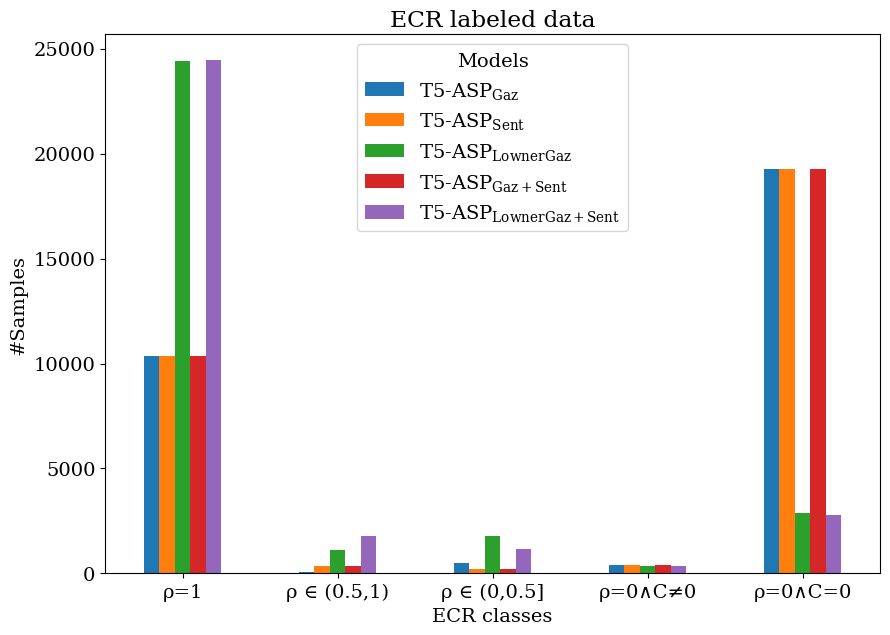

In [2]:
# ECR - labeled data - 5 classes
from evaluations.performance_01 import get_labeled_data_entity_coverage, get_ecr_plotable_table
import matplotlib.pyplot as plt

# plt.rcParams.update({
#     'mathtext.default': 'regular',
#     "mathtext.fontset":"cm",
#     "font.family": "serif",
#     "font.size": 14
# })

labeled_data_ecr_df = get_labeled_data_entity_coverage()
LATEX_THESIS_PATH = "/Users/robinloebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"

get_ecr_plotable_table(labeled_data_ecr_df, "lowner_test").plot(kind="bar", figsize=(10, 7), title="ECR labeled data", ylabel="#Samples", xlabel="ECR classes", rot=0.0)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance", "ecr_labeled_data.png"), dpi=300)

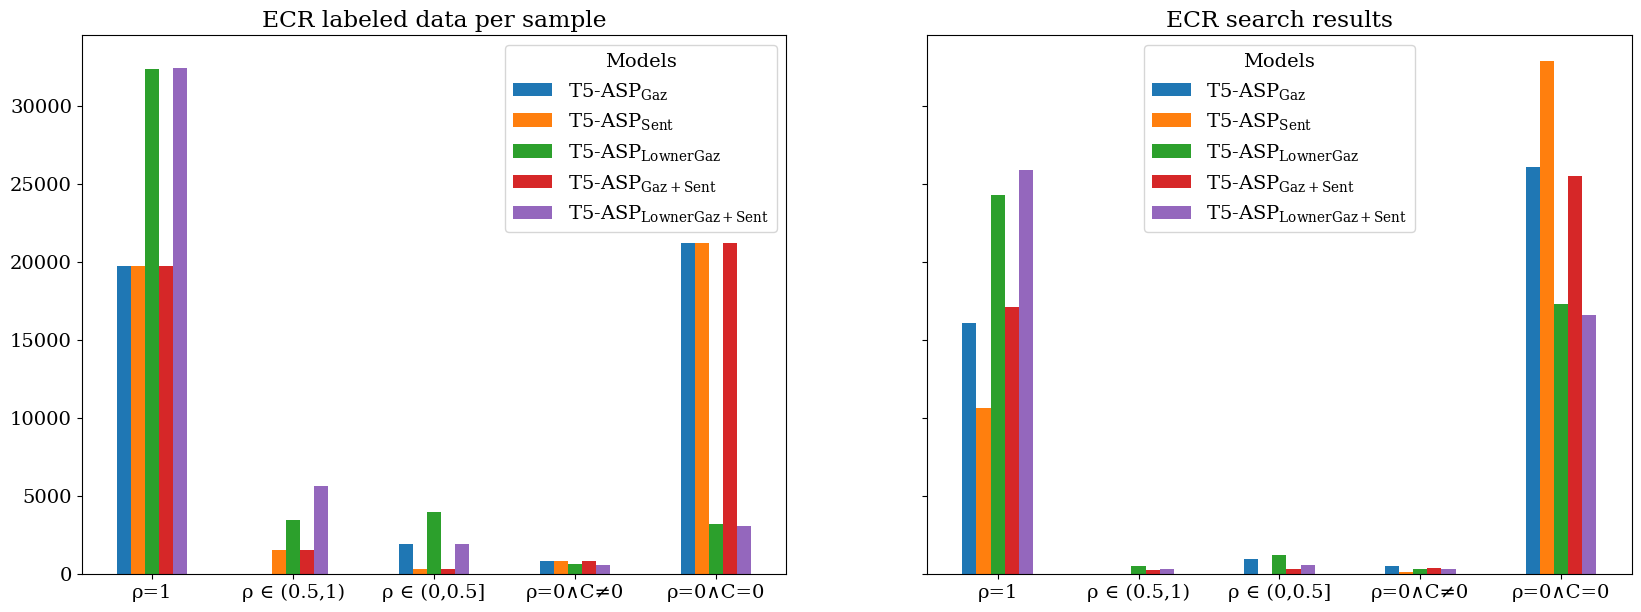

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))
from evaluations.performance_01 import aggregate_per_sample_ecr_classes, get_labeled_data_entity_coverage_per_sample, get_ecr_plotable_table

labeled_data_ecr_sample_df = get_labeled_data_entity_coverage_per_sample()
agg_labeled_data_ecr_sample_df = aggregate_per_sample_ecr_classes(labeled_data_ecr_sample_df)

get_ecr_plotable_table(agg_labeled_data_ecr_sample_df, "lowner_test").plot(kind="bar", ax=axs[0], title="ECR labeled data per sample", rot=0)
#plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance", "ecr_labeled_data_per_sample.png"), dpi=300)
from evaluations.performance_01 import get_search_results_entity_coverage_per_sample, aggregate_per_sample_ecr_classes

search_results_data_ecr = get_search_results_entity_coverage_per_sample()
agg_search_results_data_ecr = aggregate_per_sample_ecr_classes(search_results_data_ecr)

get_ecr_plotable_table(agg_search_results_data_ecr, "lowner_test").plot(kind="bar", ax=axs[1], title="ECR search results", rot=0)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance", "ecr_per_sample.png"), dpi=300)

## Context Coverage Ratio

In [30]:
# CCR search results

from evaluations.performance_01 import get_search_results_data_ccr_metrics

df = get_search_results_data_ccr_metrics()
df["score"] = df["total entities"] * df["search score"]
df.head()

,model,dataset,doc_id,total entities,search score,max,"φ ∈ (0.5,1]","φ ∈ (0,0.5]","φ ∈ (-0.5,0]","φ ∈ [-1,-0.5]",score
0,t5_asp_lownergaz,lowner_test,lowner_test_0,12,0.164898,0.444935,0,12,0,0,1.978779
1,t5_asp_lownergaz,lowner_test,lowner_test_1,12,0.192069,0.639595,1,11,0,0,2.304824
2,t5_asp_lownergaz,lowner_test,lowner_test_2,12,0.244841,0.318542,0,12,0,0,2.938096
3,t5_asp_lownergaz,lowner_test,lowner_test_3,12,0.086775,0.376024,0,11,1,0,1.041297
4,t5_asp_lownergaz,lowner_test,lowner_test_4,12,0.151975,0.346099,0,12,0,0,1.823706


In [8]:
df[df["model"] == "t5_asp_sent"]

,model,dataset,doc_id,total entities,search score,max,"φ ∈ (0.5,1]","φ ∈ (0,0.5]","φ ∈ (-0.5,0]","φ ∈ [-1,-0.5]",score
201800,t5_asp_sent,lowner_test,lowner_test_0,7,0.419587,0.476611,0,6,0,0,2.937111
201801,t5_asp_sent,lowner_test,lowner_test_1,7,0.534756,0.561976,6,0,0,0,3.743293
201802,t5_asp_sent,lowner_test,lowner_test_2,11,0.502550,0.532368,3,3,0,0,5.528047
201803,t5_asp_sent,lowner_test,lowner_test_3,9,0.455447,0.487919,0,6,0,0,4.099022
201804,t5_asp_sent,lowner_test,lowner_test_4,7,0.611039,0.625397,6,0,0,0,4.277272
...,...,...,...,...,...,...,...,...,...,...,...
252245,t5_asp_sent,lowner_dev,lowner_dev_3361,6,0.479686,0.499372,0,6,0,0,2.878114
252246,t5_asp_sent,lowner_dev,lowner_dev_3362,9,0.509035,0.594135,3,3,0,0,4.581311
252247,t5_asp_sent,lowner_dev,lowner_dev_3363,6,0.797964,0.834946,6,0,0,0,4.787785
252248,t5_asp_sent,lowner_dev,lowner_dev_3364,13,0.884568,0.895136,6,0,0,0,11.499381


In [10]:
from evaluations.performance_01 import get_search_results_data_ccr_max

max_ccr_search_df = get_search_results_data_ccr_max()
max_ccr_search_df[max_ccr_search_df["dataset"]=="lowner_test"].sort_values(("mean", "max"), ascending=False)

,model,dataset,mean,std
,,,max,max
10,t5_asp_lownergaz_sent,lowner_test,0.639273,0.119954
4,t5_asp_gaz_sent,lowner_test,0.630119,0.119587
13,t5_asp_sent,lowner_test,0.626859,0.119601
7,t5_asp_lownergaz,lowner_test,0.468299,0.163981
1,t5_asp_gaz,lowner_test,0.420175,0.148764


## Correlations

The higher the eecr of labeled data, the higher the model performance.

higher model performance implicates comparison -> comparison baseline is no-gazetteer T5-ASP, hence I take the performance difference for all samples. 



In [ ]:
# get model performance difference for all t5-asp.. models from t5-asp
from evaluations.performance_01 import aggregate_performance_metrics
agg_df = metrics_df.pivot_table(
        index=["seed", "model", "checkpoint", "dataset", "doc_id"],
        values=["tp", "fp", "fn"],
        aggfunc="sum")
    agg_df["precision"] = 100 * agg_df["tp"] / (agg_df["tp"] + agg_df["fp"])
    agg_df["recall"] = 100 * agg_df["tp"] / (agg_df["tp"] + agg_df["fn"])
    agg_df["f1"] = 2 * agg_df["precision"] * agg_df["recall"] / (
        agg_df["precision"] + agg_df["recall"])

agg_df.pivot_table(values=["f1"], index=["seed", "dataset", "doc_id"], columns=["model", "checkpoint"])